<a href="https://colab.research.google.com/github/avicennamumtaza/courses-machinelearning/blob/main/Jobsheet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Avicenna Mumtaza \
NIM : 2241720112 \
Prodi : D4 Teknik Informatika \
Kelas/Absen : 3C/05 \

##Praktikum 1

Klasifikasi 🐱 dan 🐶

**Deskripsi**

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

**Dataset**

Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.

Langkah 1 - Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

Langkah 2.1. Pra Pengolahan Data Training

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MachineLearning/Jobsheet11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8011 images belonging to 2 classes.


Langkah 2.2. Pra Pengolahan Data Testing

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MachineLearning/Jobsheet11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2013 images belonging to 2 classes.


Langkah 3 - Pembuatan Model CNN

Langkah 3.1.  - Inisiasi Model CNN

In [5]:
cnn = tf.keras.models.Sequential()

Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Langkah 3.3 - Pembuatan Layer Pooling 1

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.5 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (Input)

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Langkah 3.7 - Fully Connected Layer 2 (Output)

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Langkah 3.8 - Compile Model CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 1239s 5s/step - loss: 0.6730 - accuracy: 0.5893 - val_loss: 0.6318 - val_accuracy: 0.6592
Epoch 2/25
251/251 [==============================] - 44s 176ms/step - loss: 0.6223 - accuracy: 0.6550 - val_loss: 0.6253 - val_accuracy: 0.6836
Epoch 3/25
251/251 [==============================] - 43s 172ms/step - loss: 0.5817 - accuracy: 0.6943 - val_loss: 0.5485 - val_accuracy: 0.7243
Epoch 4/25
251/251 [==============================] - 44s 175ms/step - loss: 0.5477 - accuracy: 0.7220 - val_loss: 0.5506 - val_accuracy: 0.7208
Epoch 5/25
251/251 [==============================] - 44s 176ms/step - loss: 0.5291 - accuracy: 0.7319 - val_loss: 0.5855 - val_accuracy: 0.6990
Epoch 6/25
251/251 [==============================] - 44s 174ms/step - loss: 0.4977 - accuracy: 0.7542 - val_loss: 0.4878 - val_accuracy: 0.7640
Epoch 7/25
251/251 [==============================] - 45s 179ms/step - loss: 0.4670 - accuracy: 0.7747 - val_loss: 0.4884 - val_acc

Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MachineLearning/Jobsheet11/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

**Praktikum 2 - Klasifikasi Multi-label dengan Data CIFAR**

**Desclaimer**: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

**Deskripsi**

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.


Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Langkah 3 - Verifikasi Data

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
     # The CIFAR labels happen to be arrays,
     # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Langkah 4 - Buat Model CNN

Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Langkah 5 - Fit Model

In [23]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5322 - accuracy: 0.4412 - val_loss: 1.2413 - val_accuracy: 0.5568
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1717 - accuracy: 0.5835 - val_loss: 1.1007 - val_accuracy: 0.6060
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0180 - accuracy: 0.6418 - val_loss: 0.9975 - val_accuracy: 0.6496
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9207 - accuracy: 0.6771 - val_loss: 0.9602 - val_accuracy: 0.6598
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8413 - accuracy: 0.7042 - val_loss: 0.9257 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7849 - accuracy: 0.7225 - val_loss: 0.8726 - val_accuracy: 0.6942
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7329 - accuracy: 0.7449 - val_loss: 0.8555 - val_ac

Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8798 - accuracy: 0.7035 - 1s/epoch - 3ms/step


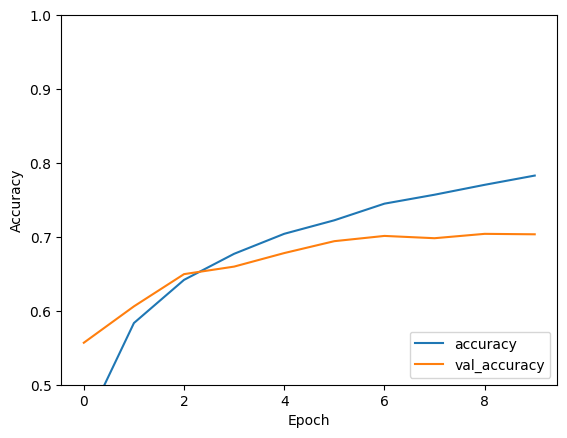

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Langkah 7 - Cetak Hasil Akurasi

In [25]:
print(test_acc)

0.703499972820282


##Tugas Praktikum

Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [26]:
model_2 =  models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 3s - loss: 2.3034 - accuracy: 0.1000 - 3s/epoch - 9ms/step


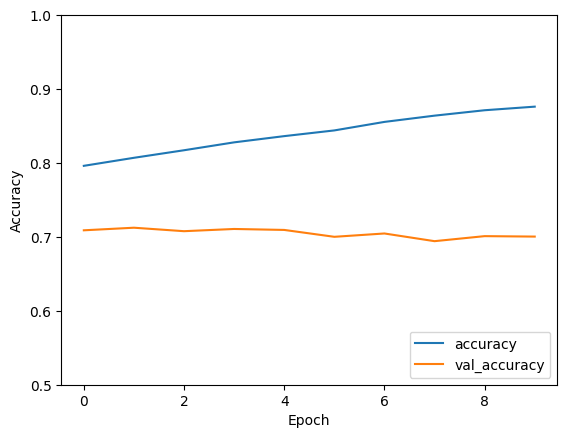

In [33]:
# history = model_2.fit(train_images, train_labels, epochs=10,
#                     validation_data=(test_images, test_labels))

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_2.evaluate(test_images, test_labels, verbose=2)

In [34]:
model_3 =  models.Sequential()

model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(1024, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 5s - loss: 2.3031 - accuracy: 0.1013 - 5s/epoch - 17ms/step


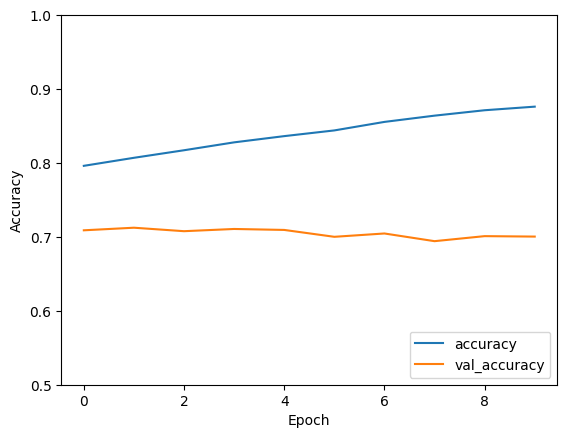

In [36]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_3.evaluate(test_images, test_labels, verbose=2)

Buatlah model CNN untuk klasifikasi dataset MNIST.

In [37]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1798 - accuracy: 0.9464 - val_loss: 0.0482 - val_accuracy: 0.9847
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0506 - accuracy: 0.9849 - val_loss: 0.0366 - val_accuracy: 0.9876
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0296 - val_accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0321 - val_accuracy: 0.9901
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0252 - accuracy: 0.9914
Test accuracy: 0.9914000034332275
